In [1]:
!pip install pyqt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pyqt (from versions: none)
ERROR: No matching distribution found for pyqt


In [2]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3843, done.
remote: Counting objects: 100% (3843/3843), done.
remote: Compressing objects: 100% (2952/2952), done.
remote: Total 3843 (delta 1109), reused 1959 (delta 840), pack-reused 0
Receiving objects: 100% (3843/3843), 49.59 MiB | 3.27 MiB/s, done.
Resolving deltas: 100% (1109/1109), done.
Updating files: 100% (3487/3487), done.


In [4]:
!sudo apt install -y protobuf-compiler

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.6.1.3-2ubuntu5.2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [5]:
%cd models/research/

/content/models/research


In [6]:
!protoc object_detection/protos/*.proto --python_out=.

In [7]:
!cp object_detection/packages/tf2/setup.py .

In [8]:
!python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 22.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 7.0 MB/s eta 0:00:00
  Prep

In [9]:
%cd /content

/content


In [10]:
!mv /content/models  /content/Tensorflow/workspace

In [ ]:
#!pip install -q kaggle

In [ ]:

#from google.colab import files
#files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhavyabhola","key":"18ac6618f6bcf4dc4aa777635a374eed"}'}

In [ ]:
#!mkdir ~/.kaggle

In [ ]:
#!cp kaggle.json ~/.kaggle/

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets download -d sbaghbidi/human-faces-object-detection

 97% 482M/498M [00:04<00:00, 80.6MB/s]
100% 498M/498M [00:04<00:00, 115MB/s] 


In [ ]:
#!unzip human-faces-object-detection.zip

Archive:  human-faces-object-detection.zip
  inflating: faces.csv               
  inflating: images/00000003.jpg     
  inflating: images/00000004.jpg     
  inflating: images/00000005.jpg     
  inflating: images/00000006.jpg     
  inflating: images/00000008.jpg     
  inflating: images/00000011.jpg     
  inflating: images/00000012.jpg     
  inflating: images/00000015.jpg     
  inflating: images/00000018.jpg     
  inflating: images/00000020.jpg     
  inflating: images/00000022.jpg     
  inflating: images/00000023.jpg     
  inflating: images/00000024.jpg     
  inflating: images/00000026.jpg     
  inflating: images/00000031.jpg     
  inflating: images/00000032.jpg     
  inflating: images/00000041.jpg     
  inflating: images/00000044.jpg     
  inflating: images/00000045.jpg     
  inflating: images/00000047.jpg     
  inflating: images/00000050.jpg     
  inflating: images/00000051.jpg     
  inflating: images/00000055.jpg     
  inflating: images/00000058.jpg     
  infla

In [ ]:
#!mv /content/images  /content/Tensorflow/workspace

In [ ]:
#!mv /content/faces.csv /content/Tensorflow/workspace/annotations

In [11]:

import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import config_util
import os
import numpy as np
import pandas as pd
import cv2 as cv

In [12]:
WORKSPACE_PATH = '/content/Tensorflow/workspace'
SCRIPTS_PATH = '/content/Tensorflow/scripts'
APIMODEL_PATH = '/content/Tensorflow/models'
ANNOTATION_PATH = WORKSPACE_PATH+'/annotations'
IMAGE_PATH = WORKSPACE_PATH+'/images'
MODEL_PATH = WORKSPACE_PATH+'/models'
PRETRAINED_MODEL_PATH = WORKSPACE_PATH+'/pre-trained-models'
CONFIG_PATH = MODEL_PATH+'/my_ssd_mobnet/pipeline.config'
CHECKPOINT_PATH = MODEL_PATH+'/my_ssd_mobnet'

In [13]:
'''for img_n in sorted(os.listdir(images_path)):
  img = cv.imread(os.path.join(images_path,img_n))
  img = np.array(img)
  print(img.shape)'''

'for img_n in sorted(os.listdir(images_path)):\n  img = cv.imread(os.path.join(images_path,img_n))\n  img = np.array(img)\n  print(img.shape)'

In [14]:
labels = [{'name':'human','id':1}]
with open(ANNOTATION_PATH + "/label_map.pbtxt" , 'w') as f:
  for label in labels:
    f.write('item{\n')
    f.write('\tid:{}\n'.format(label['id']))
    f.write('\tname:\'{}\'\n'.format(label['name']))
    f.write('}\n')

In [15]:
!python {SCRIPTS_PATH + '/generate_tfrecord.py'} -i {IMAGE_PATH + '/train'} -l {ANNOTATION_PATH + '/label_map.pbtxt'} -o {ANNOTATION_PATH + '/train.record'} -x {ANNOTATION_PATH + '/train'}
!python {SCRIPTS_PATH + '/generate_tfrecord.py'} -i {IMAGE_PATH + '/test'} -l {ANNOTATION_PATH + '/label_map.pbtxt'} -o {ANNOTATION_PATH + '/test.record'} -x {ANNOTATION_PATH + '/test'}

Successfully created the TFRecord file: /content/Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: /content/Tensorflow/workspace/annotations/test.record


In [16]:
!wget {'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'}

--2023-06-05 04:12:49--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.200.128, 2404:6800:4003:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.200.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20518283 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.57M  14.3MB/s    in 1.4s    

2023-06-05 04:12:51 (14.3 MB/s) - ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’ saved [20518283/20518283]



In [17]:
!mv ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz {PRETRAINED_MODEL_PATH}
!cd {PRETRAINED_MODEL_PATH} && tar -zxvf ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [18]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 

In [19]:
!mkdir '/content/Tensorflow/workspace/models/my_ssd_mobnet'
!cp '/content/Tensorflow/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config'  {MODEL_PATH+'/'+CUSTOM_MODEL_NAME}

In [20]:
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [21]:
CONFIG_PATH = MODEL_PATH+'/'+CUSTOM_MODEL_NAME+'/pipeline.config'

In [22]:
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)

pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH , 'r') as f:
  proto_str = f.read()
  text_format.Merge(proto_str , pipeline_config)

In [23]:
print(config)

{'model': ssd {
  num_classes: 90
  image_resizer {
    fixed_shape_resizer {
      height: 640
      width: 640
    }
  }
  feature_extractor {
    type: "ssd_mobilenet_v2_fpn_keras"
    depth_multiplier: 1.0
    min_depth: 16
    conv_hyperparams {
      regularizer {
        l2_regularizer {
          weight: 3.9999998989515007e-05
        }
      }
      initializer {
        random_normal_initializer {
          mean: 0.0
          stddev: 0.009999999776482582
        }
      }
      activation: RELU_6
      batch_norm {
        decay: 0.996999979019165
        scale: true
        epsilon: 0.0010000000474974513
      }
    }
    use_depthwise: true
    override_base_feature_extractor_hyperparams: true
    fpn {
      min_level: 3
      max_level: 7
      additional_layer_depth: 128
    }
  }
  box_coder {
    faster_rcnn_box_coder {
      y_scale: 10.0
      x_scale: 10.0
      height_scale: 5.0
      width_scale: 5.0
    }
  }
  matcher {
    argmax_matcher {
      matched_thresh

In [24]:
pipeline_config.model.ssd.num_classes = 1
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = PRETRAINED_MODEL_PATH+'/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0'
pipeline_config.train_config.fine_tune_checkpoint_type = 'detection'
pipeline_config.train_input_reader.label_map_path = ANNOTATION_PATH + "/label_map.pbtxt"
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + "/train.record"]
pipeline_config.eval_input_reader[0].label_map_path = ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/test.record']

In [25]:
print(pipeline_config)

model {
  ssd {
    num_classes: 1
    image_resizer {
      fixed_shape_resizer {
        height: 640
        width: 640
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
 

In [26]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(CONFIG_PATH, 'wb') as f:
  f.write(config_text)

In [28]:
!python "/content/Tensorflow/workspace/models/research/object_detection/model_main_tf2.py" --model_dir="/content/Tensorflow/workspace/models/my_ssd_mobnet" --pipeline_config_path="/content/Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config" --num_train_steps=4000

2023-06-05 04:27:34.291766: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-06-05 04:27:39.720293: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0605 04:27:39.740797 140661898323776 mir

In [33]:
!python "/content/Tensorflow/workspace/models/research/object_detection/exporter_main_v2.py" --input_type image_tensor --pipeline_config_path "/content/Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config" --trained_checkpoint_dir "/content/Tensorflow/workspace/models/my_ssd_mobnet" --output_directory "/content/Tensorflow/workspace/exported-model"

2023-06-05 04:33:05.083881: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-06-05 04:33:08.648024: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, b

Loading model...Done! Took 13.414530754089355 seconds
Running inference for /content/Tensorflow/workspace/images/test/Nick-Allan-640x640.jpg... 

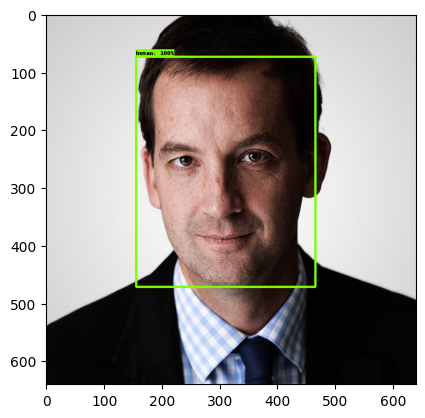

In [40]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/Tensorflow/workspace/images/test/Nick-Allan-640x640.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/Tensorflow/workspace/exported-model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/Tensorflow/workspace/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image_np = np.asarray(np.array(Image.open(IMAGE_PATHS)))
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]
input_tensor = input_tensor[:, :, :, :3] # <= add this line
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes'],
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8, 
            agnostic_mode=False)

plt.imshow(image_np_with_detections)
plt.show()

In [39]:
print(detections['detection_scores'])

[0.79338026 0.17103569 0.14811604 0.07236155 0.05115377 0.04174211
 0.03516241 0.03479151 0.03346589 0.03218378 0.02942268 0.02839357
 0.02773738 0.02766025 0.02482844 0.02426564 0.02359065 0.02334982
 0.02273742 0.02234413 0.02212804 0.02191344 0.02165614 0.02083195
 0.02070125 0.02052427 0.01985497 0.01965038 0.01901827 0.01834027
 0.01802309 0.01785562 0.01710076 0.01704027 0.01672662 0.01657121
 0.01605729 0.01597246 0.01578306 0.01568496 0.01565345 0.01563082
 0.0156257  0.01556328 0.01550818 0.01544042 0.01540036 0.01537292
 0.01533201 0.01528177 0.01507245 0.01497504 0.01485832 0.01477793
 0.01474953 0.01466131 0.01457247 0.01454137 0.01451114 0.01444513
 0.01435795 0.01434929 0.01433565 0.01424978 0.01401084 0.01398868
 0.01394381 0.01392106 0.01379493 0.01367924 0.01365305 0.01363456
 0.01360574 0.01355104 0.01354186 0.0135354  0.01342219 0.01328997
 0.01320872 0.01318956 0.01318337 0.0131409  0.01313378 0.01310741
 0.01304909 0.01302684 0.01300733 0.01291773 0.01291764 0.0128

In [29]:
!python "/content/Tensorflow/workspace/models/research/object_detection/export_tflite_graph_tf2.py" \
  --pipeline_config_path="/content/Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config" \
  --trained_checkpoint_dir="/content/Tensorflow/workspace/models/my_ssd_mobnet" \
  --output_directory="/content/tflite"

2023-06-05 04:28:43.640376: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-06-05 04:28:48.772488: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0605 04:28:54.424228 140673595430720 api.py:459] feature_map_spatial_dims: [(80, 80), (40, 40), (20, 20), (10, 10), (5, 5)]
I0605 04:28:59.953

In [30]:
!ls -lah "/content/tflite/saved_model"

total 7.9M
drwxr-xr-x 4 root root 4.0K Jun  5 04:29 .
drwxr-xr-x 3 root root 4.0K Jun  5 04:29 ..
drwxr-xr-x 2 root root 4.0K Jun  5 04:29 assets
-rw-r--r-- 1 root root   58 Jun  5 04:29 fingerprint.pb
-rw-r--r-- 1 root root 7.9M Jun  5 04:29 saved_model.pb
drwxr-xr-x 2 root root 4.0K Jun  5 04:29 variables


In [32]:
!tflite_convert --saved_model_dir="/content/tflite/saved_model" --output_file="/content/detect.tflite"

2023-06-05 04:31:51.949229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-05 04:31:55.962576: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-06-05 04:32:05.694002: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-06-05 04:32:05.694072: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
